## D Vamsidhar - 07/02/2025
### On-Policy Monte Carlo Method

In [1]:
# importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from envs import Maze
from utils import plot_policy, plot_action_values, test_agent
import warnings

warnings.filterwarnings('ignore')

In [2]:
env = Maze()

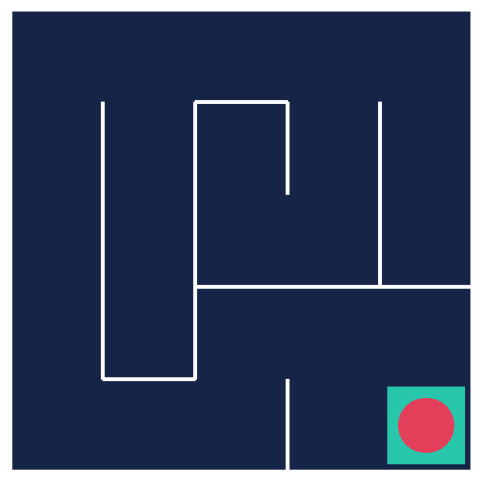

In [3]:
frame = env.render(mode='rgb_array')
plt.figure(figsize=(6,6))
plt.axis('off')
plt.imshow(frame)

In [4]:
print(f"Observation space shape: {env.observation_space.nvec}")
print(f"Action space: {env.action_space.n}")

Observation space shape: [5 5]
Action space: 4


In [5]:
action_values = np.zeros(shape=(5, 5, 4))

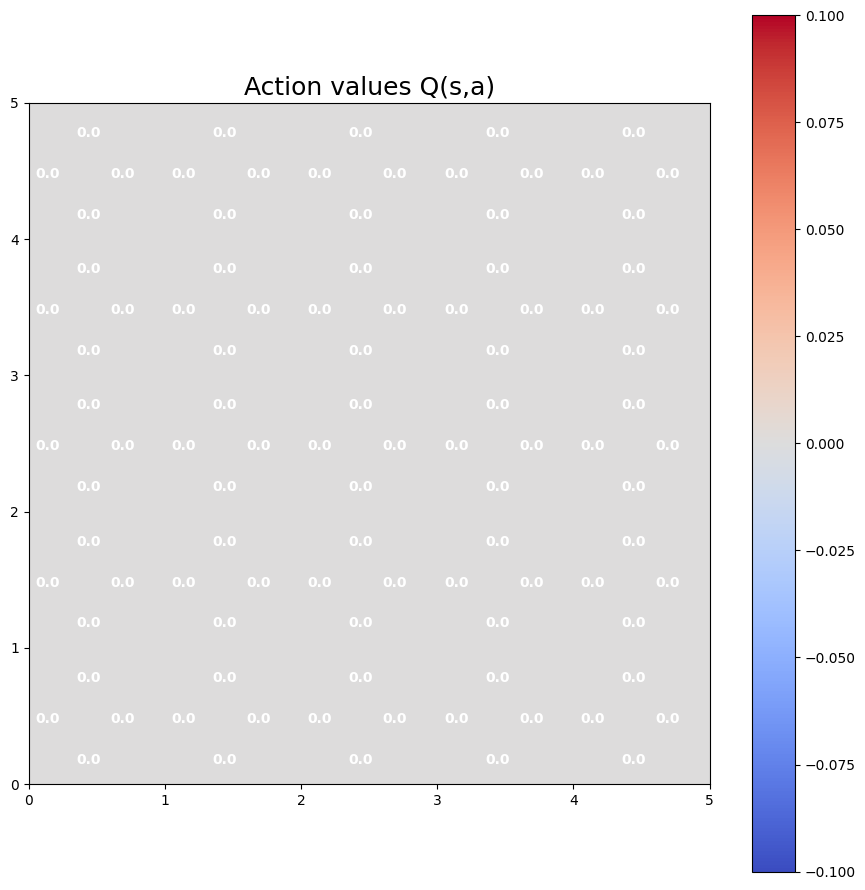

In [6]:
plot_action_values(action_values)

In [7]:
def policy(state, epsilon=0.):
    if np.random.random() < epsilon:
        return np.random.randint(4)
    else:
        av = action_values[state]
        return np.random.choice(np.flatnonzero(av==av.max()))

In [8]:
action = policy((0,0))
print(f'Action taken in state (0,0): {action}')

Action taken in state (0,0): 3


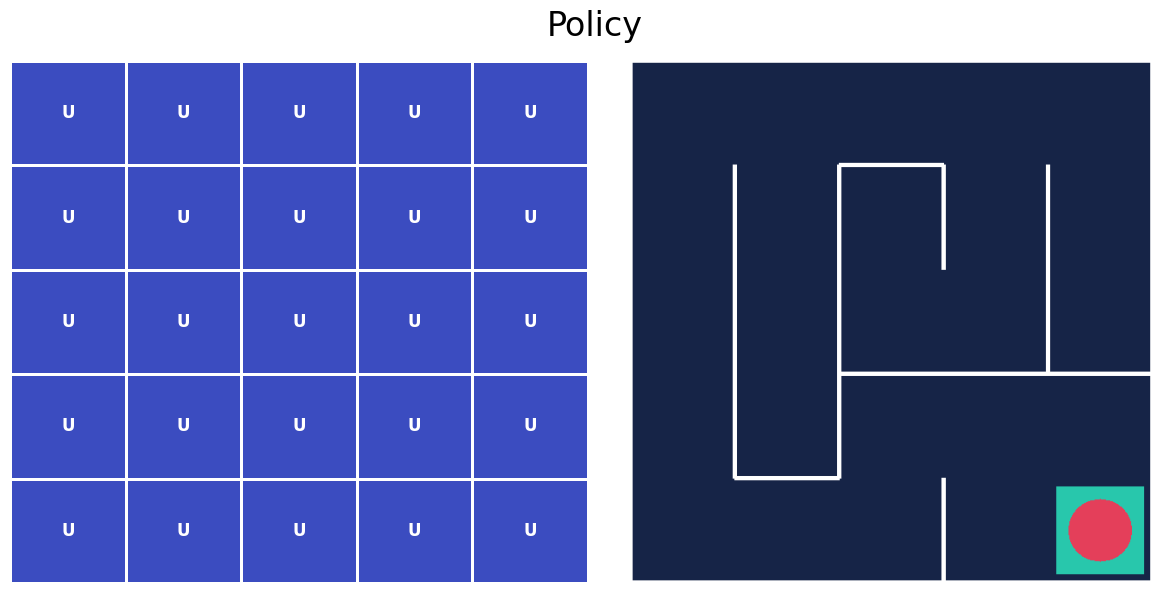

In [9]:
plot_policy(action_values, frame)

In [10]:
def op_policy_mc_control(policy, action_values, episodes, gamma=0.99, epsilon=0.2):

    sa_returns = {}

    for episode in range(1, episodes+1):
        state = env.reset()
        done = False
        transitions = []

        while not done:
            action = policy(state, epsilon)
            next_state, reward, done, _ = env.step(action)
            transitions.append([state, action, reward])
            state = next_state

        G = 0
        for state_t, action_t, reward_t in reversed(transitions):
            G = reward_t + gamma * G

            if not (state_t, action_t) in sa_returns:
                sa_returns[(state_t, action_t)] = []
            sa_returns[(state_t, action_t)].append(G)
            action_values[state_t][action_t] = np.mean(sa_returns[(state_t, action_t)])

In [ ]:
op_policy_mc_control(policy, action_values, episodes=1)

In [ ]:
plot_policy(action_values, frame)

In [ ]:
plot_action_values(action_values)